In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
tf.random.set_seed(1234)  

TensorFlow 2.x selected.


## Dataset

### tf.data.Dataset.range

In [3]:
# Create a Dataset of sequential numbers
# --------------------------------------
print("Dataset.range examples:")
print("-----------------------")

range_dataset = tf.data.Dataset.range(0, 20, 1)

print("\n1. Dataset")
for el in range_dataset:
    print(el)

# Divide in batches
bs = 3
range_dataset = tf.data.Dataset.range(0, 20, 1).batch(bs, drop_remainder=False)

print("\n2. Dataset + batch")
for el in range_dataset:
    print(el)

# Apply a transformation to each element
def map_fn(x):
    return x**2

range_dataset = tf.data.Dataset.range(0, 20, 1).batch(bs, drop_remainder=False).map(map_fn)

print("\n3. Dataset + batch + map")
for el in range_dataset:
    print(el)

# Filter dataset based on a condition
def filter_fn(x):
    return tf.equal(tf.math.mod(x, 2), 0)

range_dataset = tf.data.Dataset.range(0, 20, 1).filter(filter_fn)

print("\n4. Dataset + filter")
for el in range_dataset:
    print(el)

# Random shuffling
range_dataset = tf.data.Dataset.range(0, 20, 1).shuffle(
    buffer_size=20, reshuffle_each_iteration=False, seed=1234).batch(bs)

print("\n5. Dataset + shuffle + batch")
for el in range_dataset:
    print(el)



Dataset.range examples:
-----------------------

1. Dataset
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)

2. Dataset + batch
tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)
tf.Tensor([ 9 10 11], shape=(3,), dtype=int64)
tf.Tensor([

### tf.data.Dataset.from_tensors

In [4]:
# Create Dataset as unique element
# --------------------------------
from_tensors_dataset = tf.data.Dataset.from_tensors([1, 2, 3, 4, 5, 6, 7, 8, 9])

print("Dataset.from_tensors example:")
print("-----------------------------")
for el in from_tensors_dataset:
    print(el)

Dataset.from_tensors example:
-----------------------------
tf.Tensor([1 2 3 4 5 6 7 8 9], shape=(9,), dtype=int32)


### tf.data.Dataset.from_tensor_slices

In [5]:
# Create a Dataset of slices
# --------------------------

# All the elements must have the same size in first dimension (axis 0)
from_tensor_slices_dataset = tf.data.Dataset.from_tensor_slices(
    (np.random.uniform(size=[10, 2, 2]), np.random.randint(10, size=[10])))

print("Dataset.from_tensor_slices example:")
print("-----------------------------")
for el in from_tensor_slices_dataset:
    print(el)

Dataset.from_tensor_slices example:
-----------------------------
(<tf.Tensor: id=149, shape=(2, 2), dtype=float64, numpy=
array([[0.50092879, 0.50595999],
       [0.35067746, 0.81432196]])>, <tf.Tensor: id=150, shape=(), dtype=int64, numpy=8>)
(<tf.Tensor: id=151, shape=(2, 2), dtype=float64, numpy=
array([[0.02679761, 0.84978878],
       [0.88837963, 0.40132742]])>, <tf.Tensor: id=152, shape=(), dtype=int64, numpy=9>)
(<tf.Tensor: id=153, shape=(2, 2), dtype=float64, numpy=
array([[0.07427505, 0.85993118],
       [0.35662869, 0.70952474]])>, <tf.Tensor: id=154, shape=(), dtype=int64, numpy=4>)
(<tf.Tensor: id=155, shape=(2, 2), dtype=float64, numpy=
array([[7.70924972e-03, 9.79163487e-01],
       [6.84658410e-01, 7.01594996e-04]])>, <tf.Tensor: id=156, shape=(), dtype=int64, numpy=7>)
(<tf.Tensor: id=157, shape=(2, 2), dtype=float64, numpy=
array([[0.70579758, 0.18484865],
       [0.27876293, 0.36835746]])>, <tf.Tensor: id=158, shape=(), dtype=int64, numpy=6>)
(<tf.Tensor: id=159, sh

### tf.data.Dataset.zip

In [6]:
# Combine multiple datasets
# -------------------------
x = tf.data.Dataset.from_tensor_slices(np.random.uniform(size=10))
y = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9])

zipped = tf.data.Dataset.zip((x, y))

print("Dataset.from_tensors example:")
print("-----------------------------")
for el in zipped:
    print(el)

Dataset.from_tensors example:
-----------------------------
(<tf.Tensor: id=179, shape=(), dtype=float64, numpy=0.5929095463819035>, <tf.Tensor: id=180, shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: id=181, shape=(), dtype=float64, numpy=0.8657181714348197>, <tf.Tensor: id=182, shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: id=183, shape=(), dtype=float64, numpy=0.1278121554327969>, <tf.Tensor: id=184, shape=(), dtype=int32, numpy=3>)
(<tf.Tensor: id=185, shape=(), dtype=float64, numpy=0.9335594097511452>, <tf.Tensor: id=186, shape=(), dtype=int32, numpy=4>)
(<tf.Tensor: id=187, shape=(), dtype=float64, numpy=0.7498948364394142>, <tf.Tensor: id=188, shape=(), dtype=int32, numpy=5>)
(<tf.Tensor: id=189, shape=(), dtype=float64, numpy=0.12128855745825973>, <tf.Tensor: id=190, shape=(), dtype=int32, numpy=6>)
(<tf.Tensor: id=191, shape=(), dtype=float64, numpy=0.009881425532407007>, <tf.Tensor: id=192, shape=(), dtype=int32, numpy=7>)
(<tf.Tensor: id=193, shape=(), dtype=float64, numpy=0.8

In [7]:
# Iterate over range dataset
# --------------------------

# for a in b
for el in zipped:
    print(el)
    
print('\n')
    
# for a in enumerate(b)
for el_idx, el in enumerate(zipped):
    print(el)
    
print('\n')
    
# get iterator
iterator = iter(zipped)
print(next(iterator))

(<tf.Tensor: id=202, shape=(), dtype=float64, numpy=0.5929095463819035>, <tf.Tensor: id=203, shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: id=204, shape=(), dtype=float64, numpy=0.8657181714348197>, <tf.Tensor: id=205, shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: id=206, shape=(), dtype=float64, numpy=0.1278121554327969>, <tf.Tensor: id=207, shape=(), dtype=int32, numpy=3>)
(<tf.Tensor: id=208, shape=(), dtype=float64, numpy=0.9335594097511452>, <tf.Tensor: id=209, shape=(), dtype=int32, numpy=4>)
(<tf.Tensor: id=210, shape=(), dtype=float64, numpy=0.7498948364394142>, <tf.Tensor: id=211, shape=(), dtype=int32, numpy=5>)
(<tf.Tensor: id=212, shape=(), dtype=float64, numpy=0.12128855745825973>, <tf.Tensor: id=213, shape=(), dtype=int32, numpy=6>)
(<tf.Tensor: id=214, shape=(), dtype=float64, numpy=0.009881425532407007>, <tf.Tensor: id=215, shape=(), dtype=int32, numpy=7>)
(<tf.Tensor: id=216, shape=(), dtype=float64, numpy=0.8869183179623849>, <tf.Tensor: id=217, shape=(), dtype=int32,

# Example: Fashion MNIST - Multi-class classification
## Dataset

In [8]:
# Load built-in dataset
# ---------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape
y_train.shape

(60000, 28, 28)

(60000,)

In [0]:
# Split in training and validation sets
# e.g., 50000 samples for training and 10000 samples for validation

x_valid = x_train[50000:, ...] 
y_valid = y_train[50000:, ...] 

x_train = x_train[:50000, ...]
y_train = y_train[:50000, ...]

In [0]:
# Create Training Dataset object
# ------------------------------
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0])

# Normalize images
def normalize_img(x_, y_):
    return tf.cast(x_, tf.float32) / 255., y_

train_dataset = train_dataset.map(normalize_img)

# 1-hot encoding <- for categorical cross entropy
def to_categorical(x_, y_):
    return x_, tf.one_hot(y_, depth=10)

train_dataset = train_dataset.map(to_categorical)

# Divide in batches
bs = 32
train_dataset = train_dataset.batch(bs)

# Repeat
# Without calling the repeat function the dataset 
# will be empty after consuming all the images
train_dataset = train_dataset.repeat()

In [0]:
# Create Validation Dataset  
# -----------------------
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

# Normalize images
valid_dataset = valid_dataset.map(normalize_img)

# 1-hot encoding
valid_dataset = valid_dataset.map(to_categorical)

# Divide in batches
valid_dataset = valid_dataset.batch(1)

# Repeat
valid_dataset = valid_dataset.repeat()

In [0]:
# Create Test Dataset
# -------------------
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

test_dataset = test_dataset.map(normalize_img)

test_dataset = test_dataset.map(to_categorical)

test_dataset = test_dataset.batch(1)

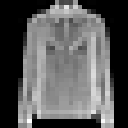

<tf.Tensor: id=364, shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [14]:
# Check that is everything is ok..

iterator = iter(train_dataset)
sample, target = next(iterator)

# Just for visualization purpouses
sample = sample[0, ...]  # select first image in the batch
sample = sample * 255  # denormalize

from PIL import Image
img = Image.fromarray(np.uint8(sample))
img = img.resize([128, 128])
img

target[0]  # select corresponding target

## Model

In [0]:
# Fashion MNIST classification
# ----------------------------

# x: 28x28
# y: 10 classes

# Create Model
# ------------
# e.g. in: 28x28 -> h: 10 units -> out: 10 units (number of classes) 

# Define Input keras tensor
x = tf.keras.Input(shape=[28, 28])

# Define intermediate hidden layers and chain
flatten = tf.keras.layers.Flatten()(x)
h = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid)(flatten)

# Define output layer and chain
out = tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)(h)

# Create Model instance defining inputs and outputs
model = tf.keras.Model(inputs=x, outputs=out)

In [16]:
# Visualize created model as a table
model.summary()

# Visualize initialized weights
model.weights

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.03036179, -0.06281489,  0.0257396 , ...,  0.03800482,
         -0.01909882,  0.05336354],
        [-0.00394604,  0.00170591, -0.0514029 , ...,  0.05030797,
          0.0382886 , -0.03114992],
        [ 0.0818864 ,  0.05883654,  0.04829731, ..., -0.05160644,
         -0.05101755,  0.05875803],
        ...,
        [ 0.05402381, -0.00915979, -0.02856489, ...,  0.04777338,
          0.05148549, -0.08004379],
        [ 0.03537666,  0.06979673, -0.05969963, ...,  0.01393002,
          0.06334465, -0.04543552],
        [ 0.03403018, -0.05196487, -0.00468538, ..., -0.01439087,
          0.05410584,  0.00825624]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.10681671, -0.21565178,  0.54518306,  0.33767676, -0.09082237,
         -0.52187

In [0]:
# Equivalent formulation
# ----------------------

# Create model with sequential 
# (uncomment to run)
# seq_model = tf.keras.Sequential()
# seq_model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # or as a list
# seq_model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.sigmoid))
# seq_model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

In [0]:
# seq_model.summary()
# seq_model.weights

## Prepare the model for training

In [0]:
# Optimization params
# -------------------

# Loss
loss = tf.keras.losses.CategoricalCrossentropy()

# learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# -------------------

# Validation metrics
# ------------------

metrics = ['accuracy']
# ------------------

# Compile Model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

## Training

In [0]:
model.fit(x=train_dataset,  # you can give directly numpy arrays x_train
          y=None,   # if x is a Dataset y has to be None, y_train otherwise
          epochs=10, 
          steps_per_epoch=int(np.ceil(x_train.shape[0] / bs)),  # how many batches per epoch
          validation_data=valid_dataset,  # give a validation Dataset if you created it manually, otherwise you can use 'validation_split' for automatic split
          validation_steps=10000)  # number of batches in validation set

Train for 1563 steps, validate for 10000 steps
Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.9828 - accuracy: 0.3064 - val_loss: 1.7295 - val_accuracy: 0.5334
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5945 - accuracy: 0.6262 - val_loss: 1.4654 - val_accuracy: 0.6894
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3619 - accuracy: 0.7067 - val_loss: 1.2464 - val_accuracy: 0.7282
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1625 - accuracy: 0.7345 - val_loss: 1.0865 - val_accuracy: 0.7499
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0258 - accuracy: 0.7528 - val_loss: 0.9725 - val_accuracy: 0.7577
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9236 - accuracy: 0.7622 - val_loss: 0.8840 - val_accuracy: 0.7640
Epoch 7/10
1418/1563 [==========================>...] - ETA: 0s - loss: 0.847

## Training with callbacks

In [0]:
import os
from datetime import datetime

cwd = os.getcwd()

exps_dir = os.path.join(cwd, 'experiments')
if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

now = datetime.now().strftime('%b%d_%H-%M-%S')

exp_dir = os.path.join(exps_dir, 'exp_' + str(now))
if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

# Model checkpoint
# ----------------
ckpt_dir = os.path.join(exp_dir, 'ckpts')
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'ckpt_{epoch:02d}'), 
                                                   save_weights_only=True)  # False to save the model directly
# ----------------

# Visualize Learning on Tensorboard
# ---------------------------------
tb_dir = os.path.join(exp_dir, 'tb_logs')
if not os.path.exists(tb_dir):
    os.makedirs(tb_dir)
    
# By default shows losses and metrics for both training and validation
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                             histogram_freq=1)  # if 1 shows weights histograms
# ---------------------------------

model.fit(x=train_dataset,
          epochs=10,  #### set repeat in training dataset
          steps_per_epoch=int(np.ceil(x_train.shape[0] / bs)),
          validation_data=valid_dataset,
          validation_steps=10000, 
          callbacks=[ckpt_callback, tb_callback])

# How to visualize Tensorboard

# 1. tensorboard --logdir EXPERIMENTS_DIR --port PORT     <- from terminal
# 2. localhost:PORT   <- in your browser

## Test model

In [0]:
# Let's try a different way to give data to model 
# using directly the NumPy arrays

# model.load_weights('/path/to/checkpoint')  # use this if you want to restore saved model

eval_out = model.evaluate(x=x_test / 255.,
                          y=tf.keras.utils.to_categorical(y_test),
                          verbose=0)

eval_out

## Compute prediction

In [0]:
# Compute output given x

shoe_img = Image.open('shoe.png').convert('L')

shoe_arr = np.expand_dims(np.array(shoe_img), 0)

out_softmax = model.predict(x=shoe_arr / 255.)

out_softmax  # is already a probability distribution (softmax)

In [0]:

out_softmax = tf.keras.activations.softmax(tf.convert_to_tensor(out_softmax))
out_softmax

In [0]:
# Get predicted class as the index corresponding to the maximum value in the vector probability
predicted_class = tf.argmax(out_softmax, 1)
predicted_class